In [6]:
# this is some code to get pretty highlighted cells for the questions - ignore this
from IPython.display import HTML
style1 = "<style>div.warn { background-color: #fcf2f2;border-color: #dFb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;}</style>"
HTML(style1)

This notebook covers some worked examples and some examples for you to try relating to **Block B, Chapter 7** in the notes.  This is practice and core material for coursework 2 and 3. The green questions are those most closely related to the assessed work for this module. *Once you have completed this workbook you should be able to attempt QN 3 on coursework 2.*

## Least squares fitting straight line/linear regression

To fit a straight line to the data we want to express the fit as a linear relation in the form of $y = A + Bx$ where $A$ is the y-intercept and $B$ is the gradient ie the true value of $y_i$ is given by 

$y_i = A+Bx_i$


**Homoscedastic errors**

So now we need to assume that the errors associated with $x$ are also normally distributed. Consequently, we can express the probability of obtaining a measurement of $y_i$ as:

$p_{A,B}(y_i) \propto \dfrac{1}{\sigma_y} {\rm exp}\left( -\dfrac{(y_i-A-Bx_i)^2}{2\sigma_y^2}   \right)$

If each $y_i$ at each $x_i$ is drawn randomly, the probability of getting the entire observed data set is

$p_{A,B}(y_1,y_2,...y_N)\propto \dfrac{1}{\sigma_y^N} {\rm exp}\left( -\dfrac{\chi^2}{2}   \right)$

We are trying to maximise the probability of the observed data set then the exponential term must be minimised so $\chi^2$ (chi-squared) will equal zero. The equation for chi-squared is 

$\chi^2 = \sum^N_{i=1} \dfrac{(y_i-A-Bx_i)^2}{\sigma_y^2}$

Need to differentiate the above equation and set equal to zero:

$ \dfrac{\partial \chi^2 }{\partial A} = \dfrac{-2}{\sigma_y^2} \sum^N_{i=1} (y_i -A-Bx_i) = 0$

$ \dfrac{\partial \chi^2 }{\partial B} = \dfrac{-2}{\sigma_y^2}x_i \sum^N_{i=1} (y_i -A-Bx_i) = 0$

These can be solved and result in the following set of equations (for homoscedastic case) for the best fit parameters are (these are given in the lecture notes)

$A = \dfrac{\sum x^2 \sum y - \sum x \sum xy} {N\sum x^2 - (\sum x)^2}$

$B = \dfrac{N \sum xy - \sum x \sum y} {N\sum x^2 - (\sum x)^2}$

We can derive these by minimising the chi-squared and maximise of probability of getting the data set observed.

We know that $y_i$ are distributed about some true value with spread $\sigma_y$ but the equations for $A$ and $B$ don't actually depend on this!  But we can estimate the value of $\sigma_y$ given that true values of $y_i$ should depend on $A$ and $B$. 

For errors in $A$ and $B$ we need to use the standard deviation of the $y$ data:

$\sigma_y = \sqrt{ \dfrac{1}{N} \sum^N_{i-1} (y_i - A-Bx_i)^2 }$

Error propogation results in the following equations for $A$ and $B$:

$\sigma_A = \sigma_y   \sqrt{ \dfrac{\sum x^2}{N\sum x^2 - (\sum x)^2}  }$

$\sigma_B = \sigma_y   \sqrt{ \dfrac{N}{N\sum x^2 - (\sum x)^2}  }$


**Heteroscedastic errors with a linear fit**

Weight the probabilities by the errors where $w = 1/\sigma^2$

$A = \dfrac{\sum wx^2 \sum wy - \sum wx \sum wxy }{\sum w \sum wx^2 - (\sum wx)^2}$

$B = \dfrac{\sum w \sum wxy - \sum wx \sum wy }{\sum w \sum wx^2 - (\sum wx)^2}$

**Monte Carlo in fitting data**

Suppose we have good reason to think that nature generates values of some physical quantity  $y$  in a way that depends on some other physical quantity  $x$, in the manner of some model, let's say: $y(x)=Ax+B$
 
We would like to find out the values $y$ and ranges of $A$ and $B$ by taking a number of measurements of $y(x)$ to trace the relationship. Suppose also that there is some uncertainty in each of the measurements. 

To explore how our measurements might behave, we can simulate a large number of hypothetical experiments by using Monte Carlo methods and assess the range of parameters returned from these simulated or "fake" experiments.

We can approach this by simulating how much each measured $y_i$ we've generated, deviates from the "true" value $g_i$ which our model (in the example above, the straight line) predicts.


## Worked example: Curve fitting

In this example, we will generate some fake data and fit a curve to it using `scipy's optimize curvefit` function.  This generates a fit by minimising the sum of the squared residuals of f(xdata,fit parameters) - ydata.  We're going to perturb each data point y by adding on some delta $y$ to create new "noisy" data.  

To get an error on our "noisy" data, we are going to simply generate random variables.

<ErrorbarContainer object of 3 artists>

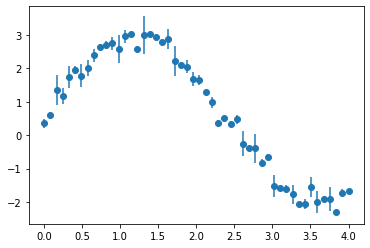

In [1]:
from scipy import optimize
import numpy as np
import pylab as plt 
%matplotlib inline  

# this is a function that we think may explain the data
def test_func(x, a,b,c):
    return a * np.sin(b * x)+c

# generate some fake data
# start off with x array
xdata = np.linspace(0, 4, 50)
# get y from the function above
y = test_func(xdata, 2.5, 1.3, 0.5)

#N = len(y)
# initialise the random_seed for reproducability
# ie we will get the same initial random seed every time
np.random.seed(1729)
# perturb y by this noise
y_noise = 0.2*np.random.normal(size=xdata.size)
# make new y array that is noisy
ydata = y + y_noise

# set up y error 
y_sigma = 0.2*(0.5+np.random.normal(size=xdata.size))


# plot the data
plt.errorbar(xdata, ydata,yerr=y_sigma,fmt='o',label='data')



Fit parameters A, B and C are 2.485, 1.319 and 0.430

covariance matrix [[ 1.23722499e-04  1.45537331e-05  1.29967851e-05]
 [ 1.45537331e-05  4.12609822e-06 -1.42942955e-08]
 [ 1.29967851e-05 -1.42942955e-08  4.46367607e-05]]


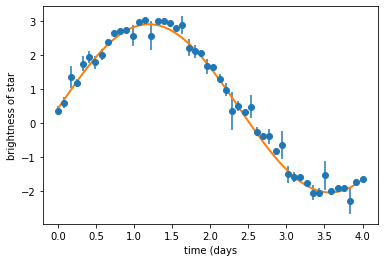

In [2]:
# get scipy to do the fitting for us
# need to include y errors
params, params_covariance = optimize.curve_fit(test_func, xdata, ydata,sigma=y_sigma,absolute_sigma=True)
print('Fit parameters A, B and C are {:.3f}, {:.3f} and {:.3f}'.format(params[0],params[1],params[2]))
print()
print('covariance matrix',params_covariance)

# plot the data
plt.errorbar(xdata, ydata,yerr=y_noise,fmt='o',label='data')
plt.xlabel('time (days')
plt.ylabel('brightness of star')

# plot the fit
plt.plot(xdata,test_func(xdata,params[0],params[1],params[2]),lw=2,label='best fit')

Look at the output above - we see the variance-covariance matrix from week 3!

In [3]:
import scipy.stats
# equation to get reduced chi^2
def chi_sq_red(x,y,y_error):
    # number of degrees of freedom
    n = len(x) - 3 #3 parameters already need to be calculated : a, b + c
    result = (1./n)*np.sum(((y-test_func(x,params[0],params[1],params[2]))/y_error)**2.0) 
    return result

# calculate chi^2 of the fit:
print('The reduced chi-squared for the fit is {:.3f}'.format(chi_sq_red(xdata,ydata,y_sigma))) 


The reduced chi-squared for the fit is 6.133


**General case of Maximum likelihood**

In the event of no prior knowledge -- i.e. a flat prior -- The likelihood of a set of model parameters $\alpha$ given the data $X$, is simply,

$\mathcal{L}(\alpha) = p(X | \alpha) = p(x_1 | \alpha) \times p(x_2 | \alpha) \times \dotsb \times p(x_N | \alpha)$

$\mathcal{L}(\alpha)\prod_{i = 1}^N~ p(x_i | \alpha),$

assuming the data points were again independent on one another.  

For a Gaussian error distribution, the likehood function is written as:

$p(x_i | \alpha) = \dfrac{1} {\sqrt{2\pi} \sigma_i} exp \left( - \dfrac{ (x_i - \mu_i(\alpha))^2 }{ 2\sigma_i^2 } \right)$

for the probability of each point, so we can write the likelihood function as,

$L(\alpha) = e^{-\chi^2/2} \times \prod_{i = 1}^N \dfrac{ 1 }{ \sigma_i } \times (2\pi)^{-N/2}.$

We can now take the natural log of this to get,

$-2\,\text{ln}\,L = \chi^2 + 2\sum_{i=1}^N\,\text{ln}\,\sigma_i + N\,\text{ln}(2\pi)$

To maximise $L(\alpha)$, we then need to minimise $ \chi^2 + 2\sum_{i=1}^N\,\text{ln}\,\sigma_i  $. The maximum likelihood $\alpha_{ML}$ is then the one that satisfies,

$\dfrac{ \partial }{ \partial \alpha } \left[ -2~\text{ln}\,L(\alpha) \right]= 0$

and the variance of $\alpha_{ML}$  this given by,

$\text{var}(\alpha_{ML}) \approx  \dfrac{ 2 } { \dfrac{ \partial^2 }{ \partial \alpha^2 } \left[ -2~\text{ln}\,L(\alpha) \right]_{\alpha=\alpha_{ML}} }$

## Your turn

<div class="alert alert-block alert-success">Question:<br><br>

Netflix managers poll their subscribers to see how the fraction of users that watched She-Ra in October 2019 $x$ compares with the age of the viewer $y$ before they decide to commission a new series of the show. This data is available in this folder and is called DataAnalysis_datafile1.dat. 

Write functions from scratch to fit a straight line to the data quoting all the fit parameters and their errors.  

Comment on the goodness of the fit and the uncertainties.
</div>

**Answer:**

*Your Answer here:*


<div class="alert alert-block alert-success">Question:<br><br>

Use Monte Carlo method to generate data from the datafile above, and derive new fit parameters A and B.
</div>

**Answer:**

*Your Answer here:*


<div class="warn">Question:<br><br>

M&M's created in the US have 50% red sweets, whereas those created in the UK only have 30% red M&Ms. You draw 5 M&Ms from an unlabeled bag and find that 2 are red.  Where did your M&Ms come from?  Tip: use likelihoods.
</div>

**Answer:**

*Your answer here:*

<div class="warn">Question:<br><br>
Find out what the scipy.optimize does and write down/define the output parameters below.    
</div>    

**Answer:**

*Your answer here:*
